In [41]:
# Force reload all modules to clear caches
import sys
import importlib

# Remove all multi_agent_system modules from cache
keys_to_delete = [key for key in list(sys.modules.keys()) if 'multi_agent_system' in key or 'langchain' in key or 'langgraph' in key or 'tavily' in key]
for key in keys_to_delete:
    try:
        del sys.modules[key]
    except:
        pass

print(f"Removed {len(keys_to_delete)} cached modules")

# Also clear importlib caches
importlib.invalidate_caches()
print("Invalidated importlib caches")

Removed 230 cached modules
Invalidated importlib caches


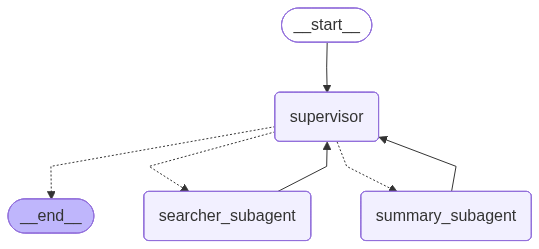

In [55]:
import sys

# Final cache clear before imports
keys_to_delete = [key for key in list(sys.modules.keys()) if 'multi_agent_system' in key]
for key in keys_to_delete:
    try:
        del sys.modules[key]
    except:
        pass

# Ensure we're in the right path
sys.path.insert(0, '/Users/lixuepeng03/Jack-Investment-Assistant')

from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.memory import InMemoryStore
from langgraph_supervisor import create_supervisor

from multi_agent_system.config import LLM_CONFIG, SUPERVISOR_PROMPT
from multi_agent_system.state import State
from multi_agent_system.searcher_agent import create_searcher_agent
from multi_agent_system.summary_agent import create_summary_agent
from multi_agent_system.utils import show_graph

"""
Create and compile the supervisor agent.
    
Returns:
    langgraph.graph: Compiled supervisor agent graph.
"""
# Initialize the LLM
llm = ChatOpenAI(**LLM_CONFIG)
    
# Initialize memory components
checkpointer = MemorySaver()
in_memory_store = InMemoryStore()

# Create sub-agents
searcher_agent = create_searcher_agent()
summary_agent = create_summary_agent()
# coder_agent = create_coder_agent()
    

# Import the supervisor creator to avoid name collision
from langgraph_supervisor import create_supervisor as create_supervisor_workflow

supervisor_prebuilt_workflow = create_supervisor_workflow(
        agents=[searcher_agent, summary_agent],
        output_mode="last_message",
        model=llm,
        prompt=SUPERVISOR_PROMPT,
        state_schema=State
    )
        
supervisor_prebuilt = supervisor_prebuilt_workflow.compile(
        name="supervisor",
        checkpointer=checkpointer,
        store=in_memory_store
    )
    
show_graph(supervisor_prebuilt)

In [ ]:
import sys

# Final cache clear before imports
keys_to_delete = [key for key in list(sys.modules.keys()) if 'multi_agent_system' in key]
for key in keys_to_delete:
    try:
        del sys.modules[key]
    except:
        pass

# Ensure we're in the right path
sys.path.insert(0, '/Users/lixuepeng03/Jack-Investment-Assistant')


from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.memory import InMemoryStore
from langgraph_supervisor import create_supervisor

from multi_agent_system.config import LLM_CONFIG, SUPERVISOR_PROMPT
from multi_agent_system.state import State
from multi_agent_system.searcher_agent import create_searcher_agent
from multi_agent_system.summary_agent import create_summary_agent
from multi_agent_system.utils import show_graph


def create_supervisor():
    """
    Create and compile the supervisor agent.
    
    Returns:
        langgraph.graph: Compiled supervisor agent graph.
    """
    # Initialize the LLM
    llm = ChatOpenAI(**LLM_CONFIG)
    
    # Initialize memory components
    checkpointer = MemorySaver()
    in_memory_store = InMemoryStore()

    # Create sub-agents
    searcher_agent = create_searcher_agent()
    summary_agent = create_summary_agent()
    # coder_agent = create_coder_agent()
    

    # Import the supervisor creator to avoid name collision
    from langgraph_supervisor import create_supervisor as create_supervisor_workflow

    supervisor_prebuilt_workflow = create_supervisor_workflow(
            agents=[searcher_agent, summary_agent],
            output_mode="last_message",
            model=llm,
            prompt=SUPERVISOR_PROMPT,
            state_schema=State
        )
        
    supervisor_prebuilt = supervisor_prebuilt_workflow.compile(
            name="supervisor",
            checkpointer=checkpointer,
            store=in_memory_store
        )
    
    show_graph(supervisor_prebuilt)
    
    return supervisor_prebuilt


if __name__ == "__main__":
    """Test the supervisor independently."""
    import uuid
    from langchain_core.messages import HumanMessage
    
    # Create the supervisor
    supervisor = create_supervisor()
    
    thread_id = uuid.uuid4()
    question = "请帮我分析一下阿里巴巴2025年第三季度的财务报告，并给出投资建议。"
    config = {"configurable": {"thread_id": thread_id}}
    
    print(f"Thread ID: {thread_id}")
    print(f"Question: {question}\n")
    
    result = supervisor.invoke(
        {"messages": [HumanMessage(content=question)]},
        config=config
    )
    
    print("Response:")
    for message in result["messages"]:
        message.pretty_print()


/Users/lixuepeng03/Jack-Investment-Assistant/.venv/lib/python3.13/site-packages/pyppeteer/us_keyboard_layout.py:73: SyntaxWarning: invalid escape sequence '\('
  'Digit9': {'keyCode': 57, 'code': 'Digit9', 'shiftKey': '\(', 'key': '9'},
/Users/lixuepeng03/Jack-Investment-Assistant/.venv/lib/python3.13/site-packages/pyppeteer/us_keyboard_layout.py:143: SyntaxWarning: invalid escape sequence '\<'
  'Comma': {'keyCode': 188, 'code': 'Comma', 'shiftKey': '\<', 'key': ','},
/Users/lixuepeng03/Jack-Investment-Assistant/.venv/lib/python3.13/site-packages/pyppeteer/us_keyboard_layout.py:247: SyntaxWarning: invalid escape sequence '\<'
  '<': {'keyCode': 188, 'key': '\<', 'code': 'Comma'},


Testing Supervisor Agent (Invoice Query)
Thread ID: 3ffb0e96-8a49-4c5a-9297-4200dcf12265
Question: 请帮我分析一下阿里巴巴2025年第三季度的财务报告，并给出投资建议。



Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.
Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Response:
================================ Human Message =================================

请帮我分析一下阿里巴巴2025年第三季度的财务报告，并给出投资建议。
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_searcher_subagent (call_b9b457b292e04c1ca3425b)
 Call ID: call_b9b457b292e04c1ca3425b
  Args:
================================= Tool Message =================================
Name: transfer_to_searcher_subagent

Successfully transferred to searcher_subagent
================================== Ai Message ==================================

根据多方信息综合，阿里巴巴2025年第三季度（2026财年第二季度）财报核心数据如下：

**财务摘要：**
*   **营收：** 2477.95亿元人民币，同比增长5%。若剔除已出售的高鑫零售和银泰业务影响，同口径收入同比增长15%。
*   **利润：** 受战略投入影响，利润显著下滑。经营利润同比下降85%至53.65亿元；非公认会计准则净利润为103.52亿元，同比下降72%。
*   **现金流：** 经营活动产生的现金流量净额为100.99亿元，同比下降68%。

**业务亮点：**
1.  **阿里云：** 收入达398.24亿元，同比增长34%，增速创近年新高。AI相关产品收入连续九个季度实现三位数增长，在中国AI云市场占据领先地位（份额35.8%）。
2.  **即时零售：** 收入同比增长60%至229.06亿元，主要由“淘宝闪购”驱动。尽管前期投入导致亏损，但单位经济效益（UE）已显

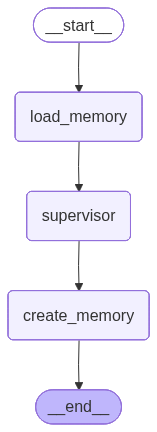

In [54]:
"""Summary agent for web search and information retrieval."""
import sys

# Final cache clear before imports
keys_to_delete = [key for key in list(sys.modules.keys()) if 'multi_agent_system' in key]
for key in keys_to_delete:
    try:
        del sys.modules[key]
    except:
        pass

# Ensure we're in the right path
sys.path.insert(0, '/Users/lixuepeng03/Investment-Assistant')


from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.memory import InMemoryStore
from multi_agent_system.state import State
from multi_agent_system.utils import show_graph
from multi_agent_system.memory_tool import load_memory
from multi_agent_system.supervisor import create_supervisor
from multi_agent_system.memory_agent import create_memory
from langgraph.checkpoint.memory import MemorySaver # For short-term memory (thread-level state persistence)
from langgraph.store.memory import InMemoryStore # For long-term memory (storing user preferences)
from multi_agent_system.config import LLM_CONFIG
from langgraph.store.base import BaseStore # Base class for defining custom stores for LangGraph

llm = ChatOpenAI(**LLM_CONFIG)

in_memory_store = InMemoryStore()

checkpointer = MemorySaver()

invest_assistan_agent = StateGraph(State)

invest_assistan_agent.add_node("load_memory", load_memory) 
invest_assistan_agent.add_node("supervisor", create_supervisor)  # Call the function to get the compiled graph
invest_assistan_agent.add_node("create_memory", create_memory)

invest_assistan_agent.add_edge(START, "load_memory")
invest_assistan_agent.add_edge("load_memory", "supervisor")
invest_assistan_agent.add_edge("supervisor", "create_memory")
invest_assistan_agent.add_edge("create_memory", END)

# Compile the entire, sophisticated graph.
invest_assistant_workflow = invest_assistan_agent.compile(name="multi_agent_verify", checkpointer=checkpointer, store=in_memory_store)

show_graph(invest_assistant_workflow)


In [51]:
"""Summary agent for web search and information retrieval."""
import sys

# Final cache clear before imports
keys_to_delete = [key for key in list(sys.modules.keys()) if 'multi_agent_system' in key]
for key in keys_to_delete:
    try:
        del sys.modules[key]
    except:
        pass

# Ensure we're in the right path
sys.path.insert(0, '/Users/lixuepeng03/Investment-Assistant')


from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.memory import InMemoryStore
from multi_agent_system.state import State
from multi_agent_system.utils import show_graph
from multi_agent_system.memory_tool import load_memory
from multi_agent_system.supervisor import create_supervisor
from multi_agent_system.memory_agent import create_memory
from langgraph.checkpoint.memory import MemorySaver # For short-term memory (thread-level state persistence)
from langgraph.store.memory import InMemoryStore # For long-term memory (storing user preferences)
from multi_agent_system.config import LLM_CONFIG
from langgraph.store.base import BaseStore # Base class for defining custom stores for LangGraph



def create_invest_assistant():
    """Creates a multi-agent investment assistant with memory management."""
     # Initialize the LLM
    llm = ChatOpenAI(**LLM_CONFIG)

    in_memory_store = InMemoryStore()

    checkpointer = MemorySaver()

    invest_assistan_agent = StateGraph(State)

    invest_assistan_agent.add_node("load_memory", load_memory) 
    invest_assistan_agent.add_node("supervisor", create_supervisor)
    invest_assistan_agent.add_node("create_memory", create_memory)

    invest_assistan_agent.add_edge(START, "load_memory")
    invest_assistan_agent.add_edge("load_memory", "supervisor")
    invest_assistan_agent.add_edge("supervisor", "create_memory")
    invest_assistan_agent.add_edge("create_memory", END)

    # Compile the entire, sophisticated graph.
    invest_assistant_workflow = invest_assistan_agent.compile(name="multi_agent_verify", checkpointer=checkpointer, store=in_memory_store)
    
    return invest_assistant_workflow

if __name__ == "__main__":
    """Test the invest assistant independently."""
    import uuid
    from langchain_core.messages import HumanMessage
    
    # Create the invest assistant
    invest_assistant = create_invest_assistant()

    show_graph(invest_assistant)

    thread_id = uuid.uuid4()
    config = {"configurable": {"thread_id": thread_id, "user_id" : "5"}}

    question = "我常年炒股，且仅持有工商银行和茅台，请帮我分析我的投资风格，并回答我持仓是否合理，只需要回答合理或者不合理"

    result = invest_assistant.invoke({"messages": [HumanMessage(content=question)]}, config=config)

    # Print results
    print("Response:")
    result["messages"][-1].pretty_print()
    # for message in result["messages"]:
    #     message.pretty_print() 


    print("---------分割线----------\n")

    

    question2 = "请结合我的投资偏好，给我一些投资建议，控制在50字以内"
    result2 = invest_assistant.invoke({"messages": [HumanMessage(content=question2)]}, config=config)
    

    # Print results
    print("Response:")
    result2["messages"][-1].pretty_print()
    # for message in result2["messages"]:
    #     message.pretty_print() 
    
    


Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Response:
================================== Ai Message ==================================
Name: supervisor

不合理。
---------分割线----------



Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel remaining_steps, ignoring it.


Response:
================================== Ai Message ==================================
Name: supervisor

建议保留部分仓位，增配医疗、科技类ETF及债券，适度分散行业与风险，增强组合抗波动能力，兼顾长期稳定与增长潜力。
